<a href="https://colab.research.google.com/github/vmavis/colab/blob/main/crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:**
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the Neccessary Libraries and Data (2 pts.)

We import all the required libraries and functions so we can run our code smoothly later.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

We import our data from our storage and assign it to a variable.

In [ ]:
data = pd.read_csv('C:/Users/User/Downloads/evenID.csv')

## 2. Data Exploration (15 pts.)

We use shape to see the number of rows and columns of our data set. From the output given, we can see that our data set has 1031744 rows and 23 columns.

In [ ]:
data.shape

(1031744, 23)

We use head() to see the first few rows of our data set. We can compare this to our csv file to make sure that we have imported the correct data set.

In [ ]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,861410,11476552,JB475560,10/14/2018 06:51:00 PM,039XX W OGDEN AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,...,22.0,29.0,06,1150286.0,1889027.0,2018,10/21/2018 04:09:44 PM,41.851393,-87.723904,"(41.851393305, -87.723903515)"
1,783641,10828749,JA130110,01/25/2017 11:00:00 PM,011XX S OAKLEY BLVD,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,25.0,28.0,03,1161221.0,1894904.0,2017,02/14/2017 03:49:42 PM,41.867300,-87.683606,"(41.867300404, -87.683606131)"
2,650716,11031423,JA363907,07/26/2017 12:30:00 AM,018XX N CLARK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,43.0,7.0,07,1174558.0,1912475.0,2017,02/10/2018 03:50:01 PM,41.915229,-87.634119,"(41.915228778, -87.634118723)"
3,496462,10430338,HZ168230,02/26/2016 03:00:00 AM,002XX W JACKSON BLVD,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,...,2.0,32.0,06,1174641.0,1898950.0,2016,02/10/2018 03:50:01 PM,41.878114,-87.634219,"(41.878113603, -87.634218691)"
4,946330,11361027,JB324433,06/26/2018 12:30:00 PM,0000X E MONROE ST,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,42.0,32.0,06,1176686.0,1899939.0,2018,07/03/2018 03:55:36 PM,41.880782,-87.626680,"(41.880781519, -87.626680112)"


We use info() to see the number of non-null records and the data type of each variable. From the output given, we can see that most variables with float data type have null values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028467 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031735 non-null  float64
 14  Community Area        1031742 non-

We use hist() to put out the histograms of this data set. We are able to see the distribution of the numerical columns. I choose to visualise 6 columns which are shown below.

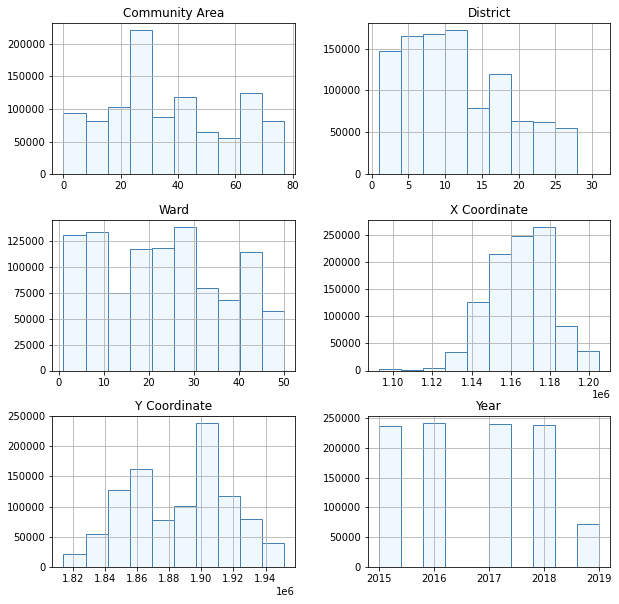

In [ ]:
data_for_hist = data[['District', 'Ward', 'Community Area', 'Year', 'X Coordinate', 'Y Coordinate']]
data_for_hist.hist(figsize=(10,10), color='aliceblue', edgecolor='steelblue')
plt.show()

We use isnull() and sum() to collect the total number of null/missing values. We multiply it by 100 and divide it by the length of our data to see the percentage of the missing values. From the output given, we can see that the columns 'Latitude', 'Longitude', and 'Location' have the highest percentage of missing values.

In [ ]:
missingvalues = data.isnull().sum()*100/len(data)
missingvalues

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.317618
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000097
Ward                    0.000872
Community Area          0.000194
FBI Code                0.000000
X Coordinate            1.224625
Y Coordinate            1.224625
Year                    0.000000
Updated On              0.000000
Latitude                1.224625
Longitude               1.224625
Location                1.224625
dtype: float64

We use sns.heatmap() to plot the correlation of our numerical columns. From the output given, we can see that most correlations are quite low. One of the highest ones are between the columns 'Beat' and 'District' with a correlation of 1.

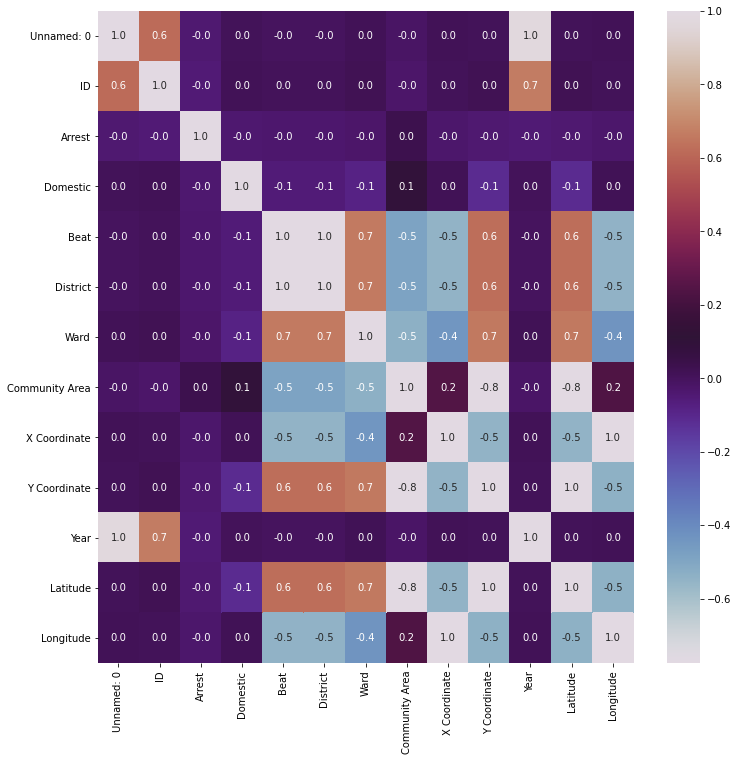

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.1f', cmap="twilight")
plt.show()

We use pd.to_datetime() to change the datatype of the column 'Date' to datetime so we can separately obtain the hour, day, and month of each date.

In [ ]:
data['Date'] =  pd.to_datetime(data['Date'], infer_datetime_format=True)
data['Hour'] = data['Date'].dt.hour
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

We use countplot() to see the number of values of a certain column. We only take a look at a few columns and their 10 top values.

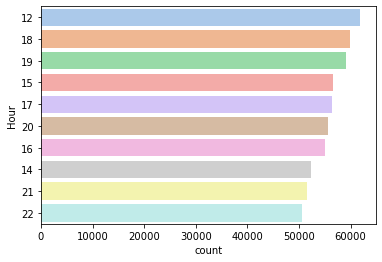

In [ ]:
sns.countplot(y = 'Hour', data = data, order = data['Hour'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

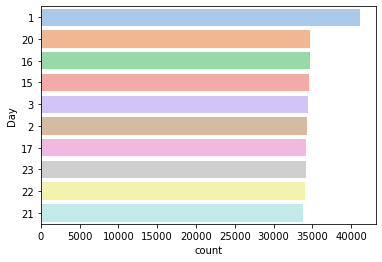

In [ ]:
sns.countplot(y = 'Day', data = data, order = data['Day'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

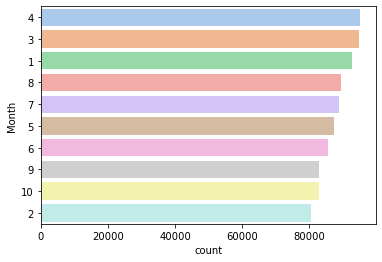

In [ ]:
sns.countplot(y = 'Month', data = data, order = data['Month'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

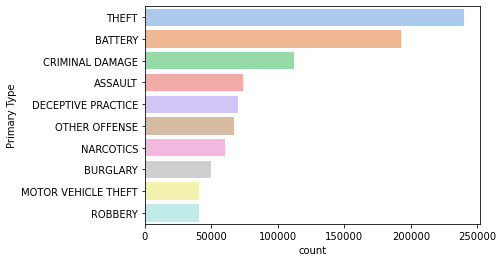

In [ ]:
sns.countplot(y = 'Primary Type', data = data, order = data['Primary Type'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

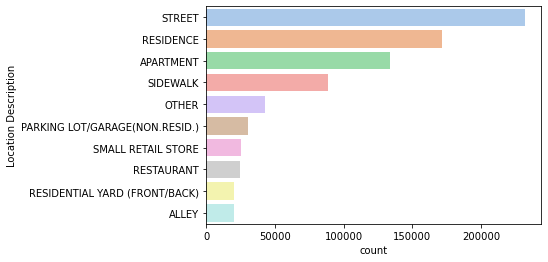

In [ ]:
sns.countplot(y = 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

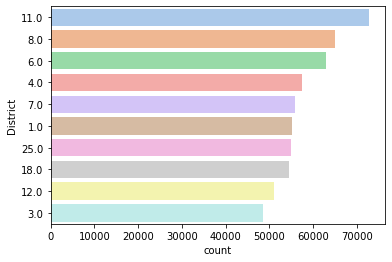

In [ ]:
sns.countplot(y = 'District', data = data, order = data['District'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

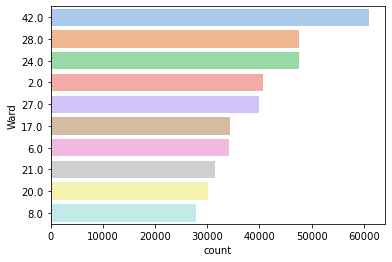

In [ ]:
sns.countplot(y = 'Ward', data = data, order = data['Ward'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

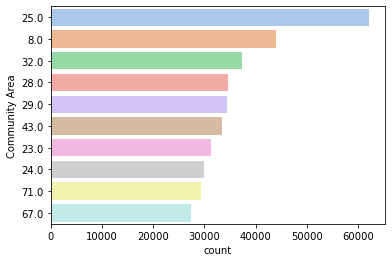

In [ ]:
sns.countplot(y = 'Community Area', data = data, order = data['Community Area'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

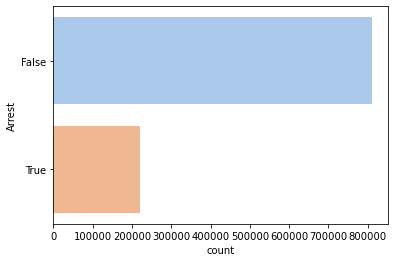

In [ ]:
sns.countplot(y = 'Arrest', data = data, order = data['Arrest'].value_counts().iloc[:10].index, palette='pastel')
plt.show()

We use pd.crosstab() to see the frequency of each crime that happens at each time. We can see that battery, sexual assault, criminal damage, etc happened on 1st of January 2015 at 1 a.m.

In [ ]:
pd.crosstab(data['Date'], data['Primary Type'])

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,0,3,0,0,26,2,0,28,0,...,0,6,0,0,0,0,15,0,2,1
2015-01-01 00:01:00,0,0,3,1,0,25,4,0,36,0,...,0,3,0,0,0,0,16,0,9,2
2015-01-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2015-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-03 23:21:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-05-03 23:25:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2019-05-03 23:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We use data.columns and len() to compute the proportion of each class. We can see that the class 'object' is the most common while the class 'integer' is the least common. Since we do not have an extreme imbalance (less than 1% of total columns), we do not need to decide on a way to handle it.

In [ ]:
data_col = data.columns
data_len = len(data_col)

int_col = data.select_dtypes('int64').columns
int_len = len(int_col)
int_prop = (int_len/data_len)*100

float_col = data.select_dtypes('float64').columns
float_len = len(float_col)
float_prop = (float_len/data_len)*100

object_col = data.select_dtypes('object').columns
object_len = len(object_col)
object_prop = (object_len/data_len)*100

int_prop, float_prop, object_prop

(26.923076923076923, 26.923076923076923, 34.61538461538461)

## 3. Data Preparation (30 pts.)

We drop all the columns we won't be using for our computation. We then only choose the name of each block as the block number should not concern us. We see the first few rows of our newly assigned data set to check if the columns have actually been removed.

In [ ]:
df = data.drop(data.columns[[0,1,2,5,7,11,15,19,22]], axis=1)
df['Block'] = df['Block'].str[7:]
df.head()

,Date,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day,Month
0,2018-10-14 18:51:00,OGDEN AVE,THEFT,SMALL RETAIL STORE,True,False,10.0,22.0,29.0,1150286.0,1889027.0,2018,41.851393,-87.723904,18,14,10
1,2017-01-25 23:00:00,OAKLEY BLVD,ROBBERY,STREET,False,False,12.0,25.0,28.0,1161221.0,1894904.0,2017,41.867300,-87.683606,23,25,1
2,2017-07-26 00:30:00,CLARK ST,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,43.0,7.0,1174558.0,1912475.0,2017,41.915229,-87.634119,0,26,7
3,2016-02-26 03:00:00,JACKSON BLVD,THEFT,CONVENIENCE STORE,False,False,1.0,2.0,32.0,1174641.0,1898950.0,2016,41.878114,-87.634219,3,26,2
4,2018-06-26 12:30:00,MONROE ST,THEFT,SMALL RETAIL STORE,False,False,1.0,42.0,32.0,1176686.0,1899939.0,2018,41.880782,-87.626680,12,26,6


We create a new column which shows the total number of crime that happens at each time. We group the column 'Primary Type' by the column 'Date' and use size() to compute the total number of each crime. We add the new column to our dataframe and name it 'Crime Rate'. We create another new column based on the new column we just created and name it 'Crime Rate Level'. We then see the first few rows of our dataframe to make sure we have the correct values.

In [ ]:
df = df.join(df['Primary Type'].groupby(df['Date']).size(), on='Date', rsuffix='_r')
df = df.rename(columns={'Primary Type_r':'Crime Rate'})
conditions = [(df['Crime Rate'] >= 0) & (df['Crime Rate'] <= 14),
              (df['Crime Rate'] >= 15) & (df['Crime Rate'] <= 33),
              (df['Crime Rate'] >= 34)]
values = ['Low', 'Medium', 'High']
df['Crime Rate Level'] = np.select(conditions, values)
df.head()

,Date,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day,Month,Crime Rate,Crime Rate Level
0,2018-10-14 18:51:00,OGDEN AVE,THEFT,SMALL RETAIL STORE,True,False,10.0,22.0,29.0,1150286.0,1889027.0,2018,41.851393,-87.723904,18,14,10,1,Low
1,2017-01-25 23:00:00,OAKLEY BLVD,ROBBERY,STREET,False,False,12.0,25.0,28.0,1161221.0,1894904.0,2017,41.867300,-87.683606,23,25,1,7,Low
2,2017-07-26 00:30:00,CLARK ST,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,43.0,7.0,1174558.0,1912475.0,2017,41.915229,-87.634119,0,26,7,6,Low
3,2016-02-26 03:00:00,JACKSON BLVD,THEFT,CONVENIENCE STORE,False,False,1.0,2.0,32.0,1174641.0,1898950.0,2016,41.878114,-87.634219,3,26,2,4,Low
4,2018-06-26 12:30:00,MONROE ST,THEFT,SMALL RETAIL STORE,False,False,1.0,42.0,32.0,1176686.0,1899939.0,2018,41.880782,-87.626680,12,26,6,5,Low


We drop the null/missing values as they will hinder our computation. We then see the shape of our data set to check the current amount of rows and columns.

In [ ]:
df = df.dropna()

As we have a massive amount of records, it is better to pick out samples to run our models later on. We assign it to a new variable and see the shape to check the current amount of rows and columns.

In [ ]:
df1 = df.sample(n=500, random_state=42)
df1.shape

(500, 19)

We use StandardScaler() to scale our data. Our models later will be able to perform better if the data is on the same scale.

In [ ]:
num_cols = ['District', 'Ward', 'Community Area', 'Latitude', 'Longitude']
df1[num_cols] = StandardScaler().fit_transform(df1[num_cols])
df1.head()

,Date,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day,Month,Crime Rate,Crime Rate Level
219816,2018-08-18 16:00:00,91ST ST,ASSAULT,APARTMENT,False,True,-0.632720,-0.045513,0.485777,1175573.0,1844584.0,2018,-1.269947,0.594075,16,18,8,12,Low
246289,2015-11-30 20:30:00,TALMAN AVE,MOTOR VEHICLE THEFT,STREET,False,False,1.730379,-0.190923,1.731604,1160769.0,1828619.0,2015,-1.783334,-0.339353,20,30,11,5,Low
75169,2016-06-13 22:00:00,MILWAUKEE AVE,ASSAULT,RESIDENCE,False,True,0.844217,1.699408,-1.382964,1132984.0,1941445.0,2016,1.877540,-2.031131,22,13,6,14,Low
982721,2015-10-05 01:15:00,89TH PL,BATTERY,RESIDENCE PORCH/HALLWAY,False,True,-0.632720,-1.136089,0.246195,1182058.0,1845775.0,2015,-1.233109,1.000310,1,5,10,3,Low
7164,2018-01-09 19:20:00,BYRON ST,MOTOR VEHICLE THEFT,STREET,False,False,0.991911,0.826947,-1.095466,1155921.0,1925778.0,2018,1.364962,-0.597770,19,9,1,1,Low


We assign the columns we want to use to predict the crime rate level to X. We then assign the column 'Crime Rate Level' to y as it will be the variable we're predicting.

In [ ]:
x = df1[['Arrest', 'Domestic', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude', 'Hour', 'Day', 'Month']]
y = df1['Crime Rate Level']
x.shape, y.shape

((500, 10), (500,))

We split X and Y into training and testing set. We allocate 80% of the data to our training set and 20% to our testing set. We then see the shape of our training and testing set.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((400, 10), (100, 10), (400,), (100,))

## 4. Build and Assess the Machine Learning Models (35 pts.)

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**.

### First Model: Logistic Regression

We use Logistic Regression as it is the most basic classification model. It is usually used as an alternatife to Linear Regression when categorical data is present. It also handles outliers quite well, considering we did not remove the outliers earlier.

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
acc_lr = accuracy_score(lr.predict(xtest), ytest)
f1_lr = f1_score(ytest, lr.predict(xtest), average='weighted')
acc_lr, f1_lr

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.8952380952380952)

### Second Model: Random Forest

We use Random Forest as it usually computes a very high accuracy and works well with a huge data set. However, it takes a noticably long time to run, so it is better to use the samples we tok earlier.

In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
acc_rf = accuracy_score(rf.predict(xtest), ytest)
f1_rf = f1_score(ytest, rf.predict(xtest), average='weighted')
acc_rf, f1_rf

(0.89, 0.8852910052910051)

We make a table for the accuracy scores using dataframe so it is easier for us to compare them. We can also plot the dataframe using heatmap for a better visualisation.

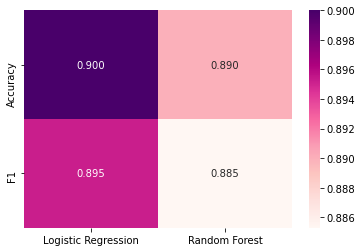

In [ ]:
lr = [acc_lr, f1_lr]
rf = [acc_rf, f1_rf]
acc_score = {'Logistic Regression': lr, 'Random Forest': rf}
acc_score_df = pd.DataFrame(acc_score, index=['Accuracy', 'F1'])
sns.heatmap(acc_score_df, annot=True, fmt='.3f', cmap="RdPu")
plt.show()

## 5. Choose your Final Model (3 pts.)

We should select Logistic Regression to be our final model as it has the highest accuracy and F1 score. We then save it to our storage as a joblib file.

In [ ]:
from joblib import dump
dump(lr, 'C:/Users/User/Downloads/ml/logisticregression_ml_finalexam.joblib')

['C:/Users/User/Downloads/ml/logisticregression_ml_finalexam.joblib']